<a href="https://colab.research.google.com/github/JongHyun070105/MachineLearning2025/blob/main/3710%EB%B0%95%EC%A2%85%ED%98%84_pandas_pivot_merge_concat(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

##피벗테이블 생성하기
###pandas.pivot_table()은 엑셀의 피벗 테이블처럼 데이터를 요약/집계하는 데 사용하는 매우 유용한 함수입니다. 데이터를 행/열 기준으로 그룹화하고, 원하는 통계값(평균, 합계 등)을 계산해줍니다

In [2]:
# pivot / pivot_table을 위한 데이터프레임 만들기
import numpy as np
import pandas as pd
pivot_data = pd.DataFrame({'cust_id': ['cust_1', 'cust_1', 'cust_1', 'cust_2', 'cust_2', 'cust_2', 'cust_3', 'cust_3', 'cust_3'],
                  'prod_cd': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
                  'grade' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
                  'purch_amt': [30, 10, 0, 40, 15, 30, 0, 0, 10]})


In [4]:
# pivot 활용하기



<bound method DataFrame.pivot of   cust_id prod_cd grade  purch_amt
0  cust_1      p1     A         30
1  cust_1      p2     A         10
2  cust_1      p3     A          0
3  cust_2      p1     A         40
4  cust_2      p2     A         15
5  cust_2      p3     A         30
6  cust_3      p1     B          0
7  cust_3      p2     B          0
8  cust_3      p3     B         10>

In [ ]:
# 중복값이 존재하는 경우 에러 메시지




In [ ]:
# pivot_table 활용하기



In [ ]:
# pivot_table의 aggfunc 지정하기




## pandas 라이브러리로 데이터프레임 합치기

### 1. 두 데이터프레임 연결하기

In [ ]:
import pandas as pd

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">초간단 데이터프레임 만들어보기</font><br>
    
- 다음과 같은 형태의 두 개의 데이터프레임을 만들어보세요
    <img src="https://www.fun-coding.org/00_Images/df_merge_practice.jpg" />
</div>

In [ ]:
df1 =



,id,customer_id,customer_name
0,1,1,Robert
1,2,2,Peter
2,3,3,Dave


In [ ]:
df2 =


,id,order_id,order_date
0,1,100,2021-01-21
1,2,200,2021-02-03
2,4,300,2020-10-01


## concat(): 두 데이터프레임을 연결해서 하나의 데이터프레임으로 만들 수 있음
## 두 데이터프레임을 위/아래 또는 왼쪽/오른쪽으로 연결하기만 함
## pd.concat([데이터프레임1, 데이터프레임2])

,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,NaN,NaN
1,2,2.0,Peter,NaN,NaN
2,3,3.0,Dave,NaN,NaN
0,1,NaN,NaN,100.0,2021-01-21
1,2,NaN,NaN,200.0,2021-02-03
2,4,NaN,NaN,300.0,2020-10-01


## pd.concat([df1, df2]) → SQL의 UNION ALL 과 유사
## pd.concat([df1, df2])
두 데이터프레임을 위로 쌓는(수직 결합) 방식

컬럼명이 정확히 일치하지 않으면, 존재하지 않는 열은 NaN으로 채워집니다.

인덱스는 그대로 유지되며, 중복 제거는 하지 않습니다.

## SQL 버전 (UNION ALL):

SELECT id, customer_id, customer_name, NULL AS order_id, NULL AS order_date FROM customers
UNION ALL
SELECT id, NULL, NULL, order_id, order_date FROM orders;
UNION ALL은 두 SELECT 결과를 그대로 결합합니다.

컬럼 수와 순서가 동일해야 하고, 없는 값은 NULL로 명시해야 합니다.

중복된 행을 제거하지 않고 모두 포함합니다.
#
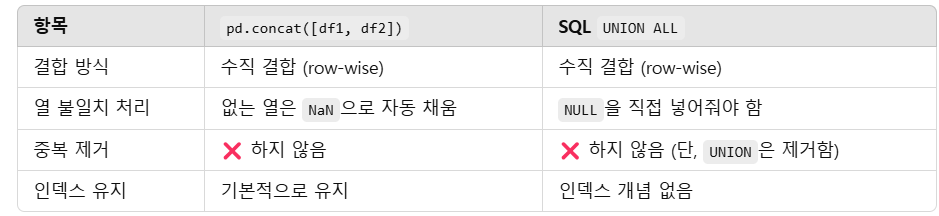

#### axis: 0 이면(디폴트) 위에서 아래로 합치고, 1 이면 왼쪽과 오른쪽으로 합침

,id,customer_id,customer_name,id,order_id,order_date
0,1,1,Robert,1,100,2021-01-21
1,2,2,Peter,2,200,2021-02-03
2,3,3,Dave,4,300,2020-10-01


### 2. 두 데이터프레임 합치기(병합하기)

- df1과 df2
<img src="https://www.fun-coding.org/00_Images/df_merge_practice.jpg" />

## merge(): 두 데이터프레임을 합치기
## merge(데이터프레임1, 데이터프레임2) : 두 데이터프레임에 동일한 이름을 가진 컬럼을 기준으로 두 데이터프레임을 합침
##d.merge(df1, df2)는 SQL의 INNER JOIN과 동일한 역할을 하는 명령어입니다.
##기본적으로 공통된 컬럼(여기서는 'id')을 기준으로 두 데이터프레임을 병합합니다.
##INNER JOIN처럼 양쪽 모두에 존재하는 id 값만 포함됩니다.
##how='inner'가 기본값입니다.

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


## merge(데이터프레임1, 데이터프레임2, on=기준컬럼명) : 기준 컬럼을 명시할 수도 있음

,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


## merge() 를 통해 어떻게 두 데이터프레임을 결함시킬 것인가에 대해 보다 상세한 기능을 제공함
## merge(데이터프레임1, 데이터프레임2, how=결합방법)
## 결합방법
##  1. inner : 내부 조인 - SQL의 INNER JOIN 과 동일
##  2. outer : 완전 외부 조인 - SQL의 OUTER JOIN 과 동일
##  3. left : 왼쪽 우선 외부 조인 - SQL의 LEFT OUTER JOIN 과 동일
##  4. right : 오른쪽 우선 외부 조인 - SQL의 RIGHT OUTER JOIN 과 동일

## 참고: merge() 함수는 SQL의 JOIN 기능과 동일함
- SQL JOIN: 두 개 이상의 테이블로부터 필요한 데이터를 연결해 하나의 포괄적인 구조로 결합시키는 연산

#### 1. inner : 내부 조인 - SQL의 INNER JOIN 과 동일 (디폴트)
- 동작 방식
  1. on의 컬럼값이 두 데이터프레임에서 동일한 행 찾기
  2. 각 동일한 행의 컬럼/컬럼값만 가져오기
  
  <img src="https://www.fun-coding.org/00_Images/merge_inner.jpg" />

In [ ]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])
df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])

In [ ]:
# inner 방식이 디폴트이므로 별도로 써주지 않아도 됨





,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


In [ ]:
# 명시적으로 써주기 위해 how 옵션을 써줄 수도 있음



,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100,2021-01-21
1,2,2,Peter,200,2021-02-03


## 2. outer : 완전 외부 조인 - SQL의 OUTER JOIN 과 동일
## 동작 방식
 ## 1. on의 컬럼값이 두 데이터프레임에서 동일한 행 찾기
 ## 2. 각 동일한 행의 컬럼/컬럼값 가져와 붙이기
##  3. 각 데이터프레임에서 on의 컬럼값이 다른 나머지 행을 찾기
 ## 4. 각 나머지 행의 컬럼/컬럼값을 가져와 별도 행으로 붙이기
   ##  - 두 데이터프레임 각각에만 있는 컬럼이어서, 컬럼값이 없을 경우 데이터 없음(NaN)으로 표기하기
     
  <img src="https://www.fun-coding.org/00_Images/merge_outer.jpg" />     

In [ ]:
### 사전 선언
import pandas as pd
data1={
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}

data2= {
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}


In [ ]:
# data1과 data2를 이용하여 데이터프레임 d1, d2를 만드시오.




In [ ]:
# 결과와 같이 되도록 merge하시오.





,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100.0,2021-01-21
1,2,2.0,Peter,200.0,2021-02-03
2,3,3.0,Dave,NaN,NaN
3,4,NaN,NaN,300.0,2020-10-01


## 3. left : 왼쪽 우선 외부 조인 - SQL의 LEFT OUTER JOIN 과 동일
## 동작 방식
 ## 1. 왼쪽 데이터프레임의 행을 모두 가져오기
 ## 2. 왼쪽 데이터프레임의 행에 있는 on의 컬럼값이 동일한 오른쪽 데이터프레임의 행만 컬럼과 함께 가져와 붙이기
##  3. 오른쪽 데이터프레임에 없는 on의 컬럼값을 가진 왼쪽 데이터프레임의 오른쪽 데이터프레임 컬럼들에는 데이터 없음(NaN)으로 표기하기
     
  <img src="https://www.fun-coding.org/00_Images/merge_left_outer.jpg" />     

In [ ]:
# 결과와 같이 되도록 d1과 d2를 merge하시오.




,id,customer_id,customer_name,order_id,order_date
0,1,1,Robert,100.0,2021-01-21
1,2,2,Peter,200.0,2021-02-03
2,3,3,Dave,NaN,NaN


## 4. right : 오른쪽 우선 외부 조인 - SQL의 RIGHT OUTER JOIN 과 동일
## 동작 방식
##  1. 오른쪽 데이터프레임의 행을 모두 가져오기
 ## 2. 오른쪽 데이터프레임의 행에 있는 on의 컬럼값이 동일한 왼쪽 데이터프레임의 행만 컬럼과 함께 가져와 붙이기
##  3. 왼쪽 데이터프레임에 없는 on의 컬럼값을 가진 오른쪽 데이터프레임의 왼쪽 데이터프레임 컬럼들에는 데이터 없음(NaN)으로 표기하기
     
  <img src="https://www.fun-coding.org/00_Images/merge_right_outer.jpg" />     

In [ ]:
# 결과와 같이 merge하시오.



,id,customer_id,customer_name,order_id,order_date
0,1,1.0,Robert,100,2021-01-21
1,2,2.0,Peter,200,2021-02-03
2,4,NaN,NaN,300,2020-10-01


## 컬럼이 아닌 인덱스를 기준 컬럼으로 사용하기
## merge(데이터프레임1, 데이터프레임2, left_index=True, right_index=True) : 기준 컬럼을 명시할 수도 있음

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">데이터프레임 조작하기 연습</font><br>
    
- 위 두 데이터프레임의 인덱스를 id 컬럼으로 만드세요
</div>

In [ ]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])
df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])



In [ ]:
# 결과와 같이 'id'를 인덱스로 설정하시오.



df1

,customer_id,customer_name
id,,
1,1,Robert
2,2,Peter
3,3,Dave


In [ ]:
# 결과와 같이 'id'를 인덱스로 설정하시오.



df2

,order_id,order_date
id,,
1,100,2021-01-21
2,200,2021-02-03
4,300,2020-10-01


<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">데이터프레임 조작하기 연습</font><br>
    
##위 두 데이터프레임을 인덱스를 기준으로 합치세요 (inner join을 사용하세요)
</div>

In [ ]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])
df1 = df1.set_index('id') #id를 인덱스로 지정
df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])
df2 = df2.set_index('id')  #id를 인덱스로 지정

In [ ]:
#결과와 같이 위 두 데이터프레임df1, df2을 인덱스를 기준으로 합치세요 (inner join을 사용하세요)





,customer_id,customer_name,order_id,order_date
id,,,,
1,1,Robert,100,2021-01-21
2,2,Peter,200,2021-02-03


<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">데이터프레임 조작하기 연습</font><br>
    
- 위 두 데이터프레임을 인덱스를 기준으로 합치세요 (outer join을 사용하세요)
</div>

In [ ]:
### 사전 선언
import pandas as pd
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'customer_id': [1, 2, 3],
    'customer_name': ['Robert', 'Peter', 'Dave']
}, columns=['id', 'customer_id', 'customer_name'])
df1 = df1.set_index('id')
df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'order_id': [100, 200, 300],
    'order_date': ['2021-01-21', '2021-02-03', '2020-10-01']
}, columns=['id', 'order_id', 'order_date'])
df2 = df2.set_index('id')

In [ ]:
#결과와 같이 위 두 데이터프레임df1, df2을 인덱스를 기준으로 합치세요 (outer join을 사용하세요)





,customer_id,customer_name,order_id,order_date
id,,,,
1,1.0,Robert,100.0,2021-01-21
2,2.0,Peter,200.0,2021-02-03
3,3.0,Dave,NaN,NaN
4,NaN,NaN,300.0,2020-10-01
